# Fashion MNIST
The objective of this Notebook is to create a classification model for the Fashion MNIST dataset. The dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels). The dataset is split into 60,000 training images and 10,000 test images. Each image is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In order to create the model, we will use the Keras API. The model will be trained locally.

The overall process will be similar to [Solve the MNIST Image Classification Problem](https://medium.com/p/9a2865bcf52a) Article from Medium.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.utils import to_categorical


## Importing the dataset

In [2]:
train_data = pd.read_csv('data/fashion-mnist_train.csv')
test_data = pd.read_csv('data/fashion-mnist_test.csv')

# We need to separate the labels and the images information:
train_labels = train_data['label']
train_images = train_data.drop('label', axis=1)

test_labels = test_data['label']
test_images = test_data.drop('label', axis=1)

# Lastly, we need to change the images information from a dataframe to a numpy array:
train_images = train_images.to_numpy()
test_images = test_images.to_numpy()

## Network architecture
We are going to use a densely connected sequential neural layers. Remember that a layer takes the previous layer output as an input. We will be doing a 3-layer network.

The first layer will have 512 neurons and the last layer will have 10 neurons. The activation function for the first layer will be ReLU and for the last layer will be softmax. The softmax function will return an array of 10 probability scores that sum to 1. Each score will be the probability that the current image belongs to one of the 10 classes.

In [3]:
network = models.Sequential() # Sequential model is a linear stack of layers
# First layer:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# Second layer:
network.add(layers.Dense(512, activation='relu'))
# Third layer:
network.add(layers.Dense(10, activation='softmax'))

## Compiling the network
We need to choose the loss function, the optimizer and the metrics to use. The loss function will be the categorical crossentropy. The optimizer will be the RMSprop. The metrics will be the accuracy.

The categorical crossentropy is the loss function used when there are more than two classes. The function is defined as:
$$
L = -\sum_{i=1}^{n}y_i\log(p_i)
$$
where $y_i$ is the target class and $p_i$ is the predicted probability for that class for all observations in the dataset.

The RMSprop is a gradient descent optimizer. The RMSprop optimizer is similar to the stochastic gradient descent optimizer, but it uses the root mean square of the gradient of the loss function with respect to the weights. The RMSprop optimizer is more efficient than the SGD optimizer.

The accuracy is the fraction of the images that were correctly classified.



In [4]:
# Compiling the network:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## Preparing the image data
The image data is a 3D tensor of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We need to transform the data into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. We also need to categorically encode the labels.

The encoding will be done using the function from keras.utils:

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Training the network
We will train the network for 5 epochs. An epoch is an iteration over the entire x and y data provided. The batch size is the number of samples per gradient update. The batch size will be 128.

A way for choosing the batch size is to use the following formula:
$$
batch\_size = 2^{n}
$$
where $n$ is an integer between 5 and 8.


In [6]:
# Training the network:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 10s 18ms/step - loss: 8.3826 - accuracy: 0.6902
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.8694 - accuracy: 0.7613
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.6887 - accuracy: 0.7964
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.5684 - accuracy: 0.8197
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.4640 - accuracy: 0.8399


We can see that the accuracy increased on each epoch. The accuracy on the test set is 0.88. We can try to improve the accuracy by changing the number of epochs, the batch size or the number of neurons in the layers.

## Evaluating the network
Now we will evaluate the network on the test set. We will use the evaluate method of the network object. The evaluate method returns the loss value and metrics values for the model in test mode.

In [7]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 4s 3ms/step - loss: 0.4901 - accuracy: 0.8450
test_acc: 0.8450000286102295


We can see that the accuracy of the test set is of 0.84. This is a little bit lower than the accuracy of the training set. This is because the network was trained on the training set and the test set is a different set of data. The network has not seen the test set before. This is why the accuracy of the test set is lower than the accuracy of the training set.

However, this is an expected result. If the accuracy of the test set was higher than the accuracy of the training set, it would mean that the network is overfitting the training set. This means that the network is memorizing the training set and it is not able to generalize to new data.

## Analyzing the results
We can analyze the results by plotting the first 25 test images, their predicted labels and the true labels. We will use the predict method of the network object. The predict method returns the output of the last layer of the network. In this case, the output of the last layer is an array of 10 probability scores that sum to 1. Each score will be the probability that the current image belongs to one of the 10 classes.


In [11]:
predictions = network.predict(test_images)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

313/313 [==============================] - 1s 4ms/step


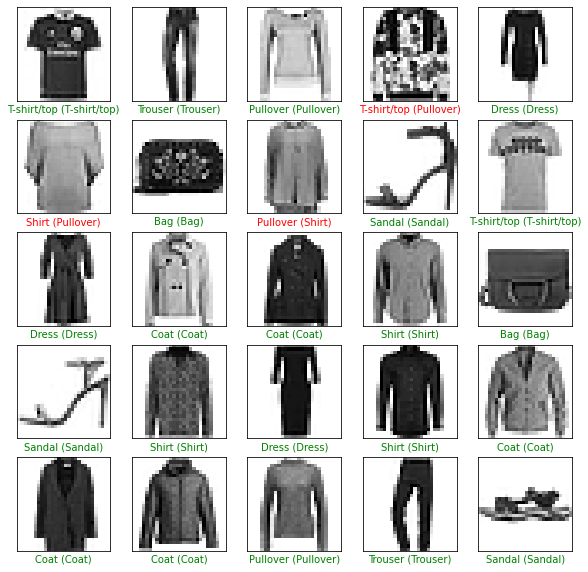

In [12]:
# Plotting the first 25 test images, their predicted labels and the true labels:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)
plt.show()

We can see that in general the network is doing a good job. However, there are some images that the network is not able to classify correctly. This is because the network is not perfect.

We can also see that the network is struggling to identify the difference between a shirt and a pullover. This is because the images of the shirt and the pullover are very similar.

## Conclusion
In this notebook, we have built a neural network to classify images of clothing from Zalando's Fashion MNIST dataset. As a first approach we can see that the network works good. However, we can improve the accuracy by changing the number of epochs, the batch size or the number of neurons in the layers.

Additionally, we can group complicated classes together. For example, we can group the shirt and the pullover together. This will make the network easier to train. Later we can split the classes again and focus only on this two classes.

## References
* [Fashion MNIST dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist/code?datasetId=2243&sortBy=voteCount)
* [Keras documentation](https://keras.io/)
* [Categorical crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression)
* [RMSprop](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp)
* [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision)
* [Epoch](https://en.wikipedia.org/wiki/Epoch_(machine_learning))
* [Batch size](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Batch_size)
* [Overfitting](https://en.wikipedia.org/wiki/Overfitting)
